# Car Price Prediction with Regression Model

## Project Overview

This project aims to predict the **price** of cars based on various features, such as the **make**, **model**, **year**, **mileage**, and **condition**. By analyzing these factors and their impact on car prices, we can build a predictive model to estimate the value of a car based on its attributes.

## About the Dataset

The dataset used in this project is a synthetic dataset generated to simulate real-world car price variability. It contains information on car prices and associated features, offering a solid foundation for data analysis and regression modeling.

## Data Source

This dataset is available on Kaggle in the following link:
> https://www.kaggle.com/datasets/mrsimple07/car-prices-prediction-data/data

## Dataset Summary
The dataset contains multiple features related to car characteristics, which are detailed below:

- **Make**: The brand or manufacturer of the car (e.g., Toyota, Honda, Ford).
- **Model**: The specific model of the car (e.g., Camry, Civic, F-150).
- **Year**: The manufacturing year of the car.
- **Mileage**: The total mileage (in miles) of the car.
- **Condition**: The condition of the car, categorized as Excellent, Good, or Fair.
- **Price**: The target variable, representing the price of the car.

## Problem Statement

This project is designed for exploratory data analysis (EDA) and predictive modeling. The main objectives include:
1. Conducting exploratory data analysis to understand data distribution and relationships.
2. Building and evaluating regression models to predict car prices based on available features.
3. Implementing feature engineering techniques for improved model performance.

### Techniques Used
- **Data Cleaning**: Handling data types, encoding categorical variables, and checking data consistency.
- **Data Visualization**: Plotting distributions, correlations, and feature impacts on car prices.
- **Regression Modeling**: Using models like Linear Regression, Ridge, Lasso, and others to predict car prices.
- **Evaluation Metrics**: Analyzing model performance using metrics like R2, RMSE, and MAE.

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

### Settings

In [2]:
# Warnings
warnings.filterwarnings("ignore")

# Plot
sns.set_style("darkgrid")

# Path
data_path = "../data"
csv_path = os.path.join(data_path, "CarPricesPrediction.csv")

### Load Data

In [5]:
df = pd.read_csv(csv_path, index_col= 0)

In [6]:
# Show 1st 5 observations to get an idea about the data stored in each feature
df.head()

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85


### Exploratory Data Analysis(EDA)

In [7]:
# Data Description
print("=" * 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

DATA DESCRIPTION
Number of observations: 1000
Number of features: 6


In [9]:
# Feature Description
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)

num_cols = [col for col in df.columns if df[col].dtype != 'object']
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

print("-" * 60)
print(f"Number of numeric features: {len(num_cols)}")
print(num_cols)
print("-" * 60)
print(f"Number of categorical features: {len(cat_cols)}")
print(cat_cols)

FEATURE DESCRIPTION
Make          object
Model         object
Year           int64
Mileage        int64
Condition     object
Price        float64
dtype: object
------------------------------------------------------------
Number of numeric features: 3
['Year', 'Mileage', 'Price']
------------------------------------------------------------
Number of categorical features: 3
['Make', 'Model', 'Condition']


In [11]:
# Missing value detection
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("No missing value is present in any feature.")

MISSING VALUE DETECTION
No missing value is present in any feature.


In [12]:
# Duplicate Row Detection
print("=" * 60)
print("DUPLICATE ROW DETECTION")
print("=" * 60)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

DUPLICATE ROW DETECTION
Number of duplicate rows: 0


### Target Analysis

Visualize the distribution of price of cars

TARGET ANALYSIS
Mean: 22195.20565
Median: 22247.875
Standard Deviation: 4245.191585398391
Range: 12613.0 - 31414.9


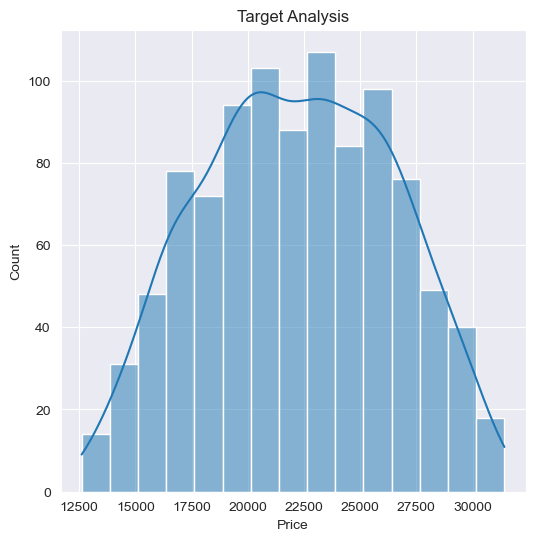

In [16]:
# Target analysis
print("=" * 60)
print("TARGET ANALYSIS")
print("=" * 60)
print(f"Mean: {df['Price'].mean()}")
print(f"Median: {df['Price'].median()}")
print(f"Standard Deviation: {df['Price'].std()}")
print(f"Range: {df['Price'].min()} - {df['Price'].max()}")
# Visulize distribution with histogram
plt.figure(figsize= (6,6))
sns.histplot(data= df, x = "Price", kde= True)
plt.title("Target Analysis")
plt.show()

### key Findings

- The target feature price is normally distributed in the range of **Rs.12613 - Rs.31414.90**.
- The average price of a car is **Rs.221195.21**.

### Car Condition Analysis

Analyze how price of car is affected by its condiion.

CAR CONDITION ANALYSIS
   Condition         Price
0  Excellent  22150.842017
1       Fair  22357.820796
2       Good  22222.674315


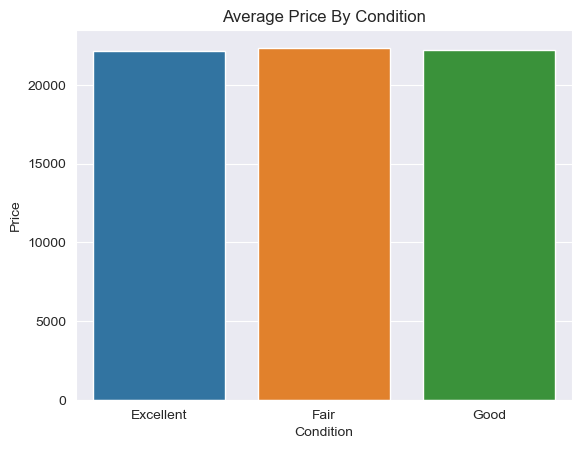

In [43]:
# Calculate average price for each condition of car
condition_price = df.groupby("Condition")["Price"].mean().reset_index()
print("=" * 60)
print("CAR CONDITION ANALYSIS")
print("=" * 60)
print(condition_price)

# Visualize the Average Price for each Condition
sns.barplot(data=condition_price, x= "Condition", y= "Price", hue= "Condition")
plt.title("Average Price By Condition")
plt.show()

### Key Findings

- Average Price is almost same for each condition of car. So, Price of car does not depend only on the condition of the car.

### Mileage Analysis

Visualize how mileage affects the car pricing.

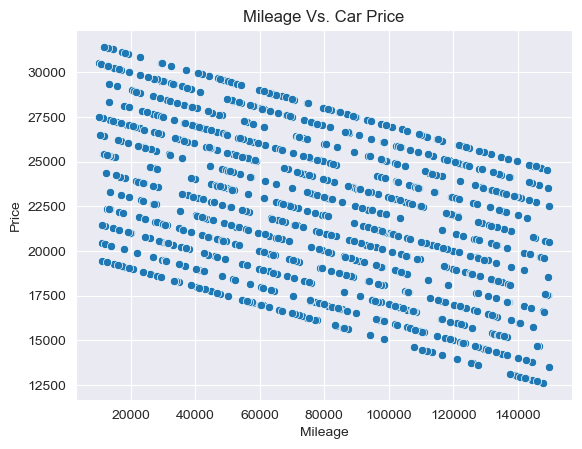

In [22]:
sns.scatterplot(data= df, x= "Mileage", y= "Price")
plt.title("Mileage Vs. Car Price")
plt.show()

### Key Findings

- More mileage driven decrease in car price. But, it depends on other factors also.

In [28]:
# Create a new feature Age from the Year of make which will be more relevant for predicting the price of the car.
df["Age"] = pd.to_datetime("now").year - df["Year"]
# Sanity check
df.head()

,Make,Model,Year,Mileage,Condition,Price,Age
0,Ford,Silverado,2022,18107,Excellent,19094.75,2
1,Toyota,Silverado,2014,13578,Excellent,27321.10,10
2,Chevrolet,Civic,2016,46054,Good,23697.30,8
3,Ford,Civic,2022,34981,Excellent,18251.05,2
4,Chevrolet,Civic,2019,63565,Excellent,19821.85,5


### Age Analysis

Visualize how the price of car depends on age of car.

AGE PRICE ANALYSIS
    Age         Price
0     2  16400.130556
1     3  16607.056494
2     4  18278.516438
3     5  19172.257059
4     6  19944.909559
5     7  21009.512162
6     8  22089.416883
7     9  23001.527419
8    10  24209.373118
9    11  25269.742466
10   12  25818.688732
11   13  27043.655435
12   14  27908.863855


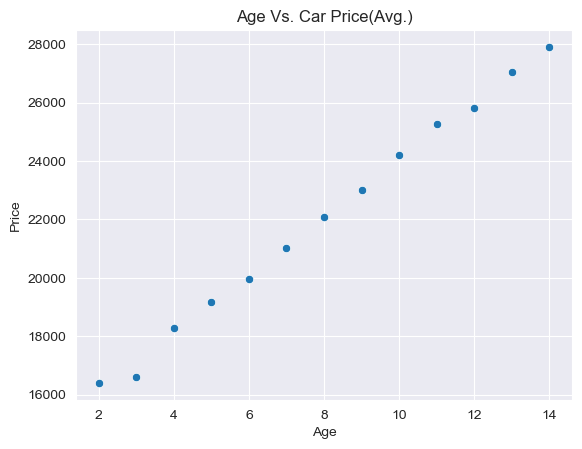

In [39]:
# Calculate the Average price by age of car
age_price = df.groupby("Age")["Price"].mean().reset_index()
print("=" * 60)
print("AGE PRICE ANALYSIS")
print("=" * 60)
print(age_price)
# Visualaze the average price by age
sns.scatterplot(data= age_price, x= "Age", y= "Price")
plt.title("Age Vs. Car Price(Avg.)")
plt.show()

### Key Findings

- Surprisingly car price increases as it get older.

### Make Price Analysis

Analyze how make of car influences the price

CAR MAKE ANALYSIS
        Make         Price
0  Chevrolet  21957.203589
1       Ford  22354.415578
2      Honda  22238.084171
3     Nissan  22587.502128
4     Toyota  21881.913415


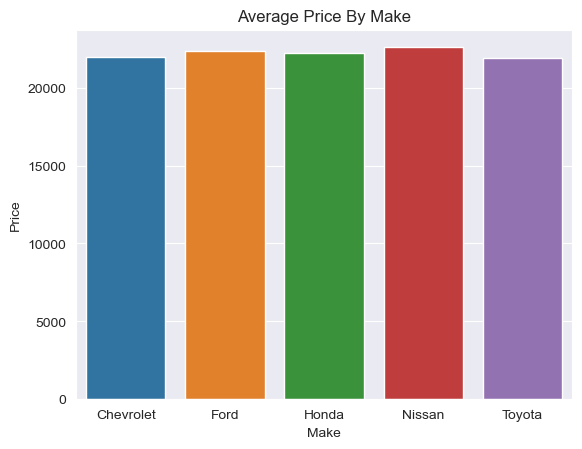

In [41]:
# Calculate average price for each make of car
make_price = df.groupby("Make")["Price"].mean().reset_index()
print("=" * 60)
print("CAR MAKE ANALYSIS")
print("=" * 60)
print(make_price)

# Visualize the Average Price for each Make
sns.barplot(data=make_price, x= "Make", y= "Price", hue= "Make")
plt.title("Average Price By Make")
plt.show()

### Key Findings

- Make of car does not influnce the pricing. This is happening as the data is collected synthetically.

### Model Price Analysis

Analyze how model of car influences the car price

CAR MODEL ANALYSIS
       Model         Price
0     Altima  21841.835619
1      Camry  22470.130189
2      Civic  22025.018407
3      F-150  22644.748404
4  Silverado  22028.735156


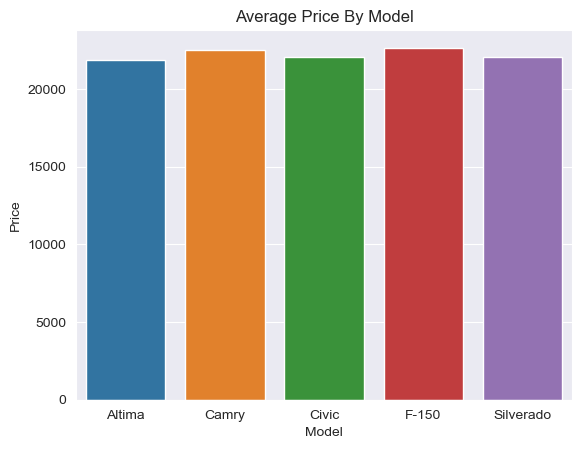

In [42]:
# Calculate average price for each model of car
model_price = df.groupby("Model")["Price"].mean().reset_index()
print("=" * 60)
print("CAR MODEL ANALYSIS")
print("=" * 60)
print(model_price)

# Visualize the Average Price for each Model
sns.barplot(data=model_price, x= "Model", y= "Price", hue= "Model")
plt.title("Average Price By Model")
plt.show()

### Key Findings

- Model of car does not influnce the pricing. This is happening as the data is collected synthetically.

### Data Cleaning

In [44]:
# Remove Year feature as more relevant feature Age has been created from it.
# Remove Make and Model of car as they does not affect the price of car.
df_cleaned = df.drop(["Make", "Model", "Year"], axis= 1)

# Sanity check
df_cleaned.head()

,Mileage,Condition,Price,Age
0,18107,Excellent,19094.75,2
1,13578,Excellent,27321.10,10
2,46054,Good,23697.30,8
3,34981,Excellent,18251.05,2
4,63565,Excellent,19821.85,5


In [47]:
# Encode the the categorical feature Condition
df_cleaned["Condition"] = df_cleaned["Condition"].map({"Good": 1, "Fair": 2, "Excellent": 3})
# Sanity check
df_cleaned.head()

,Mileage,Condition,Price,Age
0,18107,3,19094.75,2
1,13578,3,27321.10,10
2,46054,1,23697.30,8
3,34981,3,18251.05,2
4,63565,3,19821.85,5


### Correlation Analysis

In [48]:
# Find correlation of dataset
corr = df_cleaned.corr()
corr

,Mileage,Condition,Price,Age
Mileage,1.000000,-0.004215,-0.454250,0.016850
Condition,-0.004215,1.000000,-0.009096,-0.012430
Price,-0.454250,-0.009096,1.000000,0.883093
Age,0.016850,-0.012430,0.883093,1.000000


<Axes: >

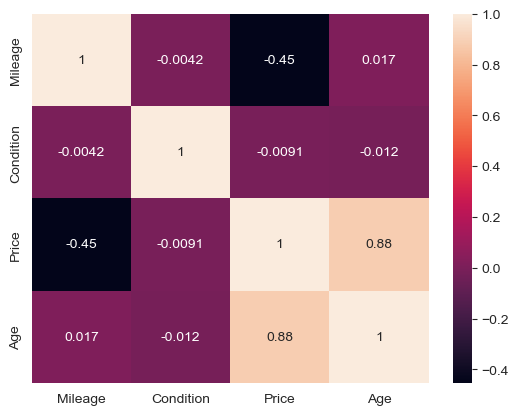

In [49]:
# Visualize correlation with heatmap
sns.heatmap(corr, annot= True)

### Key Findings

- Age has positive high correlation with Price.
- Mileage has moderate negetive correlation with Price of car.

In [50]:
# Save the cleaned data
cleaned_path = os.path.join(data_path, "CarPrice_cleaned.csv")
df_cleaned.to_csv(cleaned_path, index= False)